### Importing the libraries

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold

### Read the dataset

In [115]:
data = pd.read_csv(r"C:\Users\omarn\Downloads\hotel_bookings - hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### EDA

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [117]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [118]:
data.shape

(119390, 32)

In [119]:
# Identify all missing values
missing_summary = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

missing_info = pd.DataFrame({
    'Missing_Count': missing_summary,
    'Missing_Percentage': missing_percentage
})

print(missing_info.sort_values(by='Missing_Percentage', ascending=False))

                                Missing_Count  Missing_Percentage
company                                112593           94.306893
agent                                   16340           13.686238
country                                   488            0.408744
children                                    4            0.003350
arrival_date_month                          0            0.000000
arrival_date_week_number                    0            0.000000
hotel                                       0            0.000000
is_canceled                                 0            0.000000
stays_in_weekend_nights                     0            0.000000
arrival_date_day_of_month                   0            0.000000
adults                                      0            0.000000
stays_in_week_nights                        0            0.000000
babies                                      0            0.000000
meal                                        0            0.000000
lead_time 

In [120]:
"""
columns that have missing values:
1-children                                    
2-country
3-agent
4-company                                   

"""

'\ncolumns that have missing values:\n1-children                                    \n2-country\n3-agent\n4-company                                   \n\n'

c:\Users\omarn\anaconda3\envs\tf39\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


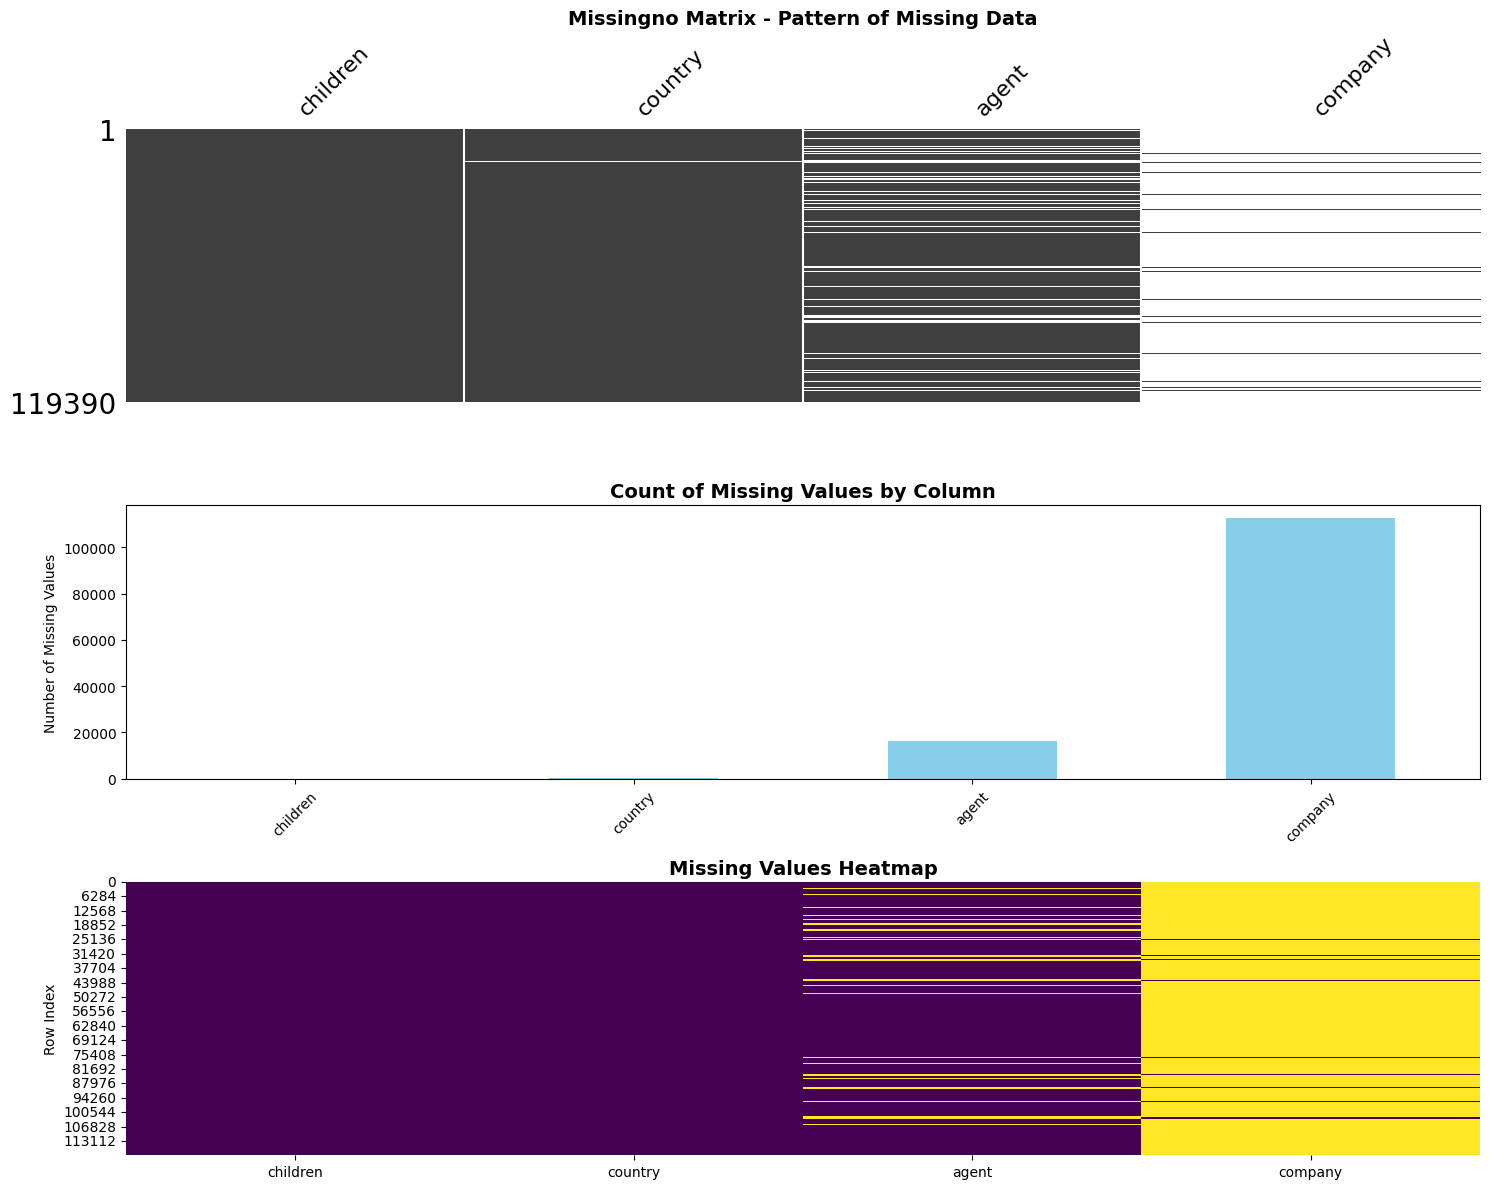


DETAILED ANALYSIS:
Total missing values: 129425
Percentage of total data missing: 3.39%
Rows with any missing values: 119173
Rows with complete data: 217

Columns with missing data:
          Missing_Count  Missing_Percentage
children              4            0.003350
country             488            0.408744
agent             16340           13.686238
company          112593           94.306893


In [121]:
# Filter columns with missing data 
missing_info = data.isnull().sum()
missing_info = missing_info[missing_info > 0]  
missing_info = missing_info.to_frame(name="Missing_Count")
missing_info["Missing_Percentage"] = (missing_info["Missing_Count"] / len(data)) * 100


fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# 1. Missingno matrix 
msno.matrix(data[missing_info.index], ax=axes[0])
axes[0].set_title('Missingno Matrix - Pattern of Missing Data', fontsize=14, fontweight='bold')

# 2. Bar chart 
missing_info['Missing_Count'].plot(kind='bar', ax=axes[ 1], color='skyblue')
axes[1].set_title('Count of Missing Values by Column', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Missing Values')
axes[1].tick_params(axis='x', rotation=45)

# 3. Heatmap 
sns.heatmap(data[missing_info.index].isnull(), cbar=False, cmap='viridis', ax=axes[2])
axes[2].set_title('Missing Values Heatmap', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Row Index')

plt.tight_layout()
plt.show()


print("\nDETAILED ANALYSIS:")
print("="*30)
print(f"Total missing values: {data.isnull().sum().sum()}")
print(f"Percentage of total data missing: {(data.isnull().sum().sum() / (data.shape[0] * data.shape[1])) * 100:.2f}%")
print(f"Rows with any missing values: {data.isnull().any(axis=1).sum()}")
print(f"Rows with complete data: {data.shape[0] - data.isnull().any(axis=1).sum()}")
print("\nColumns with missing data:")
print(missing_info)

###  Outliers

In [126]:
data['adr']=data['adr'].clip(upper=400)

max_adr = data['adr'].max()
count_above_400 = (data['adr'] == 400).sum()
print(f"Maximum ADR after capping: {max_adr}")
print(f"Number of values capped at 400: {count_above_400}")

Maximum ADR after capping: 400.0
Number of values capped at 400: 8


In [127]:
data['lead_time']=data['lead_time'].clip(upper=630)

max_lead_time = data['lead_time'].max()
count_above_630 = (data['lead_time'] == 630).sum()
print(f"Maximum ADR after capping: {max_lead_time}")
print(f"Number of values capped at 630: {count_above_630}")

Maximum ADR after capping: 630
Number of values capped at 630: 2


In [128]:
""""
-Lead Time (capped at 630)
Most bookings occur well below 630 days , Values above 630 are rare and isolated.
Capping at 630 keeps the dense distribution visible and interpretable, while grouping extreme early bookings together.
-ADR (capped at 400)
Most daily rates fall below 400 ,Extremely high ADR values (e.g., 1000+) are rare outliers.
Capping at 400 prevents these rare cases from stretching the scale, making trends in the majority of the data clearer."""

'"\n-Lead Time (capped at 630)\nMost bookings occur well below 630 days , Values above 630 are rare and isolated.\nCapping at 630 keeps the dense distribution visible and interpretable, while grouping extreme early bookings together.\n-ADR (capped at 400)\nMost daily rates fall below 400 ,Extremely high ADR values (e.g., 1000+) are rare outliers.\nCapping at 400 prevents these rare cases from stretching the scale, making trends in the majority of the data clearer.'

In [129]:
# 2 - Interquartile range(IQR)
for x in ['lead_time','adr']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

 
    max = q75+(2*intr_qr)
    min = q25-(2*intr_qr)
    print(f'For {x} Min Outliers has {data.loc[data[x] < min,x].shape[0]} rows and Max has {data.loc[data[x] > max,x].shape[0] } rows')


For lead_time Min Outliers has 0 rows and Max has 1178 rows
For adr Min Outliers has 0 rows and Max has 1780 rows


<Axes: >

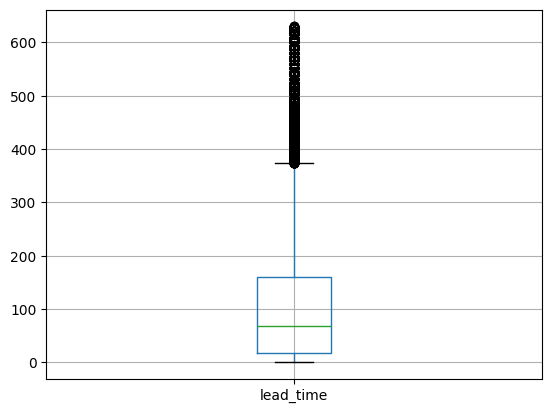

In [130]:
data.boxplot('lead_time')

<Axes: >

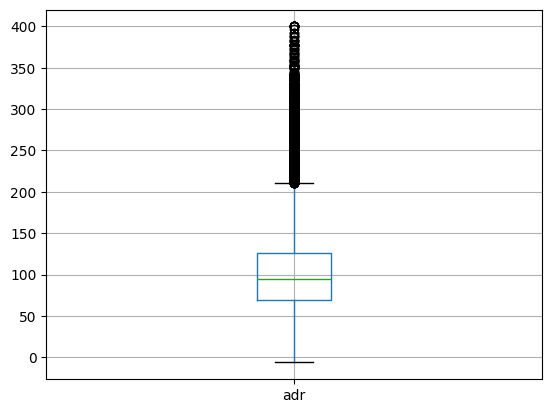

In [131]:
data.boxplot('adr')

### NUlls

In [132]:
data['company'].fillna(0,inplace=True)

C:\Users\omarn\AppData\Local\Temp\ipykernel_5644\1454823110.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['company'].fillna(0,inplace=True)


In [133]:
data['company']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: company, Length: 119390, dtype: float64

In [134]:
data['agent'].fillna(0,inplace=True)

C:\Users\omarn\AppData\Local\Temp\ipykernel_5644\3178732274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['agent'].fillna(0,inplace=True)


In [135]:
data['country'].mode().iloc[0]

'PRT'

In [136]:
data['country'].fillna(data['country'].mode().iloc[0], inplace=True)

C:\Users\omarn\AppData\Local\Temp\ipykernel_5644\2146975200.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna(data['country'].mode().iloc[0], inplace=True)


In [137]:
data['children'].median()

np.float64(0.0)

In [138]:
data['children'].fillna(data['children'].median(), inplace=True)

C:\Users\omarn\AppData\Local\Temp\ipykernel_5644\2466542962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['children'].fillna(data['children'].median(), inplace=True)


In [139]:
data.shape

(119390, 32)

In [140]:
data.duplicated().sum()

np.int64(32013)

In [141]:
data.drop_duplicates(inplace=True)

In [142]:
data.duplicated().sum()

np.int64(0)

In [143]:
data.shape

(87377, 32)

In [144]:
print(data.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [145]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,630,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [146]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [147]:
data['company']=data['company'].astype('string')
data['country']=data['country'].astype('category')
data['children']=data['children'].astype('int64')
data['agent']=data['agent'].astype('int64')

In [148]:
print(data.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                 category
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

### Feature Engineering

In [149]:
data['Total_Guests'] = data['adults'] + data['children']+data['babies']
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,630,2015,July,27,1,0,0,2,...,0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,240,0.0,0,Transient,82.0,0,1,Canceled,2015-05-06,2
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,15,0.0,0,Transient,105.5,0,0,Canceled,2015-04-22,2
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,240,0.0,0,Transient,123.0,0,0,Canceled,2015-06-23,2


In [150]:
data['Total_Nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guests,Total_Nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,630,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0.0,0,Transient,82.0,0,1,Canceled,2015-05-06,2,3
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0.0,0,Transient,105.5,0,0,Canceled,2015-04-22,2,3
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0.0,0,Transient,123.0,0,0,Canceled,2015-06-23,2,4


In [151]:
data['is_Family'] = np.where((data['children'] > 0) | (data['babies'] > 0), 'Yes', 'No')
data.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guests,Total_Nights,is_Family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0,No
1,Resort Hotel,0,630,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0,No
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1,No
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1,No
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2,No
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,2,2,No
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,Transient,103.00,0,1,Check-Out,2015-07-03,2,2,No
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.00,0,1,Canceled,2015-05-06,2,3,No
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,Transient,105.50,0,0,Canceled,2015-04-22,2,3,No
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,Transient,123.00,0,0,Canceled,2015-06-23,2,4,No


### Encoding

In [152]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                 category
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [153]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                 category
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [154]:
threshold = 500 
country_counts = data['country'].value_counts()

In [155]:
data['country_grouped'] = data['country'].apply(
    lambda x: x if  country_counts[x] >= threshold else "Other"
)

In [156]:
print(data[['country','country_grouped']].head(50))

   country country_grouped
0      PRT             PRT
1      PRT             PRT
2      GBR             GBR
3      GBR             GBR
4      GBR             GBR
6      PRT             PRT
7      PRT             PRT
8      PRT             PRT
9      PRT             PRT
10     PRT             PRT
11     PRT             PRT
12     USA             USA
13     ESP             ESP
14     PRT             PRT
15     IRL             IRL
16     PRT             PRT
17     IRL             IRL
18     FRA             FRA
19     GBR             GBR
20     GBR             GBR
21     PRT             PRT
23     PRT             PRT
24     GBR             GBR
25     PRT             PRT
26     IRL             IRL
27     PRT             PRT
28     PRT             PRT
29     PRT             PRT
30     PRT             PRT
31     GBR             GBR
32     PRT             PRT
33     IRL             IRL
34     PRT             PRT
35     PRT             PRT
36     ESP             ESP
37     PRT             PRT
3

In [157]:
data['country']=data['country_grouped']

In [158]:
data.drop('country_grouped', axis=1, inplace=True)

In [159]:
print(data['country'].head(50))

0       PRT
1       PRT
2       GBR
3       GBR
4       GBR
6       PRT
7       PRT
8       PRT
9       PRT
10      PRT
11      PRT
12      USA
13      ESP
14      PRT
15      IRL
16      PRT
17      IRL
18      FRA
19      GBR
20      GBR
21      PRT
23      PRT
24      GBR
25      PRT
26      IRL
27      PRT
28      PRT
29      PRT
30      PRT
31      GBR
32      PRT
33      IRL
34      PRT
35      PRT
36      ESP
37      PRT
38      PRT
39    Other
40      PRT
41      IRL
42      ESP
44      PRT
45      PRT
46      ESP
47      NOR
48      GBR
49      IRL
50      NOR
51      IRL
52    Other
Name: country, dtype: object


In [160]:
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object','string[python]']).columns

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guests,Total_Nights,is_Family
0,1,0,342,2015,5,27,1,0,0,2,...,0,2,0.00,0,0,1,2015-07-01,2,0,0
1,1,0,630,2015,5,27,1,0,0,2,...,0,2,0.00,0,0,1,2015-07-01,2,0,0
2,1,0,7,2015,5,27,1,0,1,1,...,0,2,75.00,0,0,1,2015-07-02,1,1,0
3,1,0,13,2015,5,27,1,0,1,1,...,0,2,75.00,0,0,1,2015-07-02,1,1,0
4,1,0,14,2015,5,27,1,0,2,2,...,0,2,98.00,0,1,1,2015-07-03,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,2,96.14,0,0,1,2017-09-06,2,7,0
119386,0,0,102,2017,1,35,31,2,5,3,...,0,2,225.43,0,2,1,2017-09-07,3,7,0
119387,0,0,34,2017,1,35,31,2,5,2,...,0,2,157.71,0,4,1,2017-09-07,2,7,0
119388,0,0,109,2017,1,35,31,2,5,2,...,0,2,104.40,0,0,1,2017-09-07,2,7,0


In [161]:
data.drop(['reservation_status','reservation_status_date'],axis=1,inplace=True)

In [162]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests,Total_Nights,is_Family
0,1,0,342,2015,5,27,1,0,0,2,...,0,0,0,2,0.0,0,0,2,0,0
1,1,0,630,2015,5,27,1,0,0,2,...,0,0,0,2,0.0,0,0,2,0,0
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,0,2,75.0,0,0,1,1,0
3,1,0,13,2015,5,27,1,0,1,1,...,304,0,0,2,75.0,0,0,1,1,0
4,1,0,14,2015,5,27,1,0,2,2,...,240,0,0,2,98.0,0,1,2,2,0


In [163]:
data.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                                int64
country                             int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
booking_changes                     int64
deposit_type                        int64
agent                             

In [164]:
correlation_matrix = data.corr()
print(correlation_matrix)

                                   hotel  is_canceled  lead_time  \
hotel                           1.000000    -0.071476   0.032444   
is_canceled                    -0.071476     1.000000   0.184770   
lead_time                       0.032444     0.184770   1.000000   
arrival_date_year              -0.079892     0.088033   0.139215   
arrival_date_month             -0.018085    -0.044417   0.013233   
arrival_date_week_number        0.018579     0.001380   0.101106   
arrival_date_day_of_month       0.008525     0.005311   0.009893   
stays_in_weekend_nights         0.161957     0.060098   0.235045   
stays_in_week_nights            0.214534     0.082858   0.310044   
adults                         -0.000866     0.081718   0.140389   
children                        0.018773     0.067341   0.028613   
babies                          0.038534    -0.020554  -0.003628   
meal                           -0.083791     0.045319   0.033659   
country                         0.141227     0.0

In [178]:
correlation = data.corr()["is_canceled"]
top_features = correlation.drop("is_canceled").abs().sort_values(ascending=False).head(25)

print("Top 10 features by correlation with is_canceled:")
print(top_features)

Top 10 features by correlation with is_canceled:
lead_time                         0.184770
required_car_parking_spaces       0.184250
market_segment                    0.181823
distribution_channel              0.150268
deposit_type                      0.137540
adr                               0.133611
total_of_special_requests         0.120580
Total_Guests                      0.100164
country                           0.096451
booking_changes                   0.093681
is_repeated_guest                 0.089670
arrival_date_year                 0.088033
Total_Nights                      0.084015
stays_in_week_nights              0.082858
adults                            0.081718
company                           0.077489
hotel                             0.071476
children                          0.067341
assigned_room_type                0.062143
stays_in_weekend_nights           0.060098
previous_bookings_not_canceled    0.052168
is_Family                         0.051615
previ

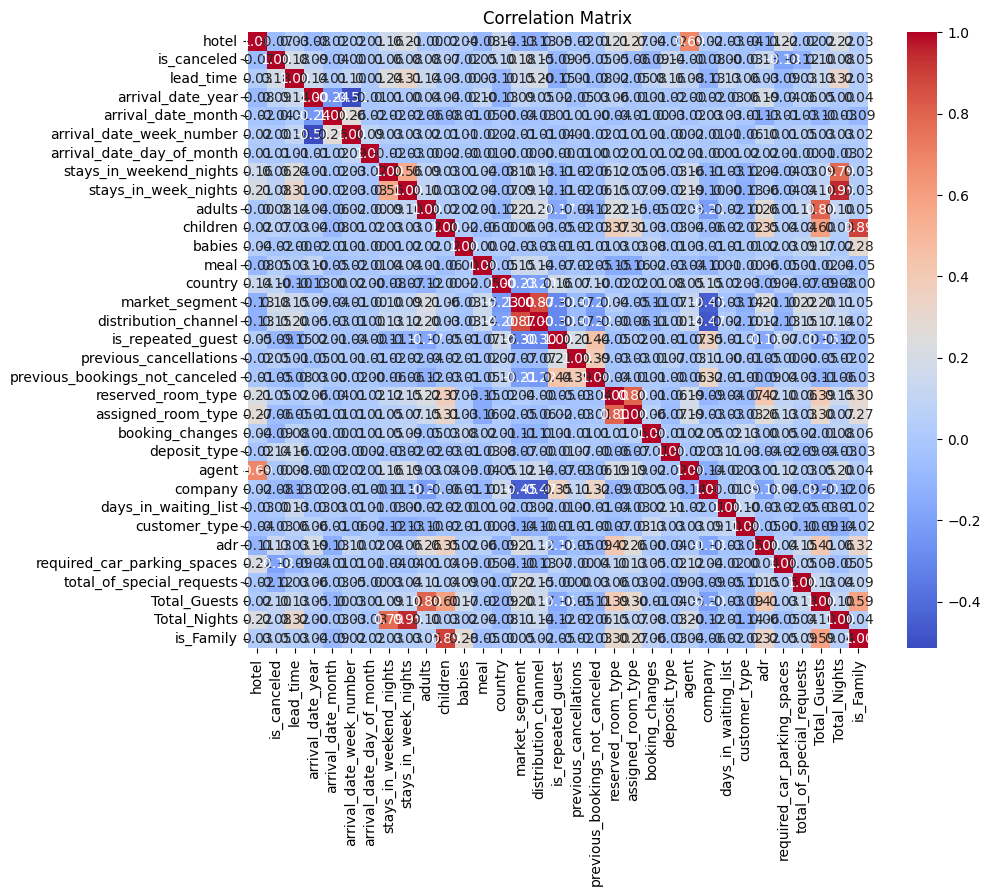

In [167]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Splitting the data

In [179]:
X_selected = data[top_features.index]
y = data["is_canceled"]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (69901, 25)
X_test shape is  (17476, 25)
y_train shape is  (69901,)
y_test shape is  (17476,)


### Make the model

In [181]:
model = RandomForestClassifier(criterion = 'gini',n_estimators=300,max_depth=20,random_state=33)
kf = KFold(n_splits=10, shuffle=True, random_state=44)

cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

print("\nCross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.82849378 0.83891273 0.84048641 0.84048641 0.83662375 0.83862661
 0.82260372 0.84034335 0.83848355 0.82961373]
Mean CV accuracy: 0.8354674035224934


In [182]:
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("\nFinal Train Accuracy:", train_score)
print("\nFinal Test Accuracy:", test_score)


Final Train Accuracy: 0.9140784824251441

Final Test Accuracy: 0.8314831769283589


In [183]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [184]:

#Calculating classification Report :  
classification_report(y_test, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.86      0.92      0.89     12594
           1       0.74      0.61      0.67      4882

    accuracy                           0.83     17476
   macro avg       0.80      0.76      0.78     17476
weighted avg       0.83      0.83      0.83     17476



In [57]:
GBCModel = GradientBoostingClassifier(n_estimators=300,max_depth=20,random_state=33) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))


GBCModel Train Score is :  0.9975107652251041
GBCModel Test Score is :  0.8530556191348134


In [58]:
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)

In [59]:
#Calculating classification Report :  
classification_report(y_test, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.88      0.93      0.90     12594
           1       0.78      0.66      0.72      4882

    accuracy                           0.85     17476
   macro avg       0.83      0.80      0.81     17476
weighted avg       0.85      0.85      0.85     17476



In [ ]:
xgbModel = XGBClassifier(n_estimators=300,max_depth=20,random_state=33) 
xgbModel.fit(X_train, y_train)

#Calculating Details
print('xgbModel Train Score is : ' , xgbModel.score(X_train, y_train))
print('xgbModel Test Score is : ' , xgbModel.score(X_test, y_test))

xgbModel Train Score is :  0.9974821533311398
xgbModel Test Score is :  0.8522545204852369


In [ ]:
y_pred = xgbModel.predict(X_test)
y_pred_prob = xgbModel.predict_proba(X_test)

In [502]:
#Calculating classification Report :  
classification_report(y_test, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.89      0.91      0.90     12594
           1       0.75      0.70      0.73      4882

    accuracy                           0.85     17476
   macro avg       0.82      0.81      0.81     17476
weighted avg       0.85      0.85      0.85     17476





### **Conclusion**

This analytical journey has provided a deeper understanding of hotel booking patterns 
and the critical factors that influence cancellations. By applying data analysis techniques 
and advanced predictive models like RandomForest, GradientBoosting
and XGBoost, we have extracted actionable insights that can empower smarter, 
data-driven decision-making within the hospitality industry.

**🔑 Key Findings:**

***Operational Efficiency:** The ability to accurately predict booking behavior is a powerful tool 
for significantly enhancing hotel operational efficiency, from resource allocation to staffing.
***Influential Factors:** Specific features, particularly **lead time** and **required_car_parking_spaces**, 
were identified as crucial determinants of cancellation probability.
***Model Performance:** The GradientBoosting and XGBoost model demonstrated superior performance in 
handling the inherent challenges of imbalanced datasets common in booking cancellation data.

**🚀 Next Steps & Future Enhancements:**

To build upon this foundation, the predictive model can be further refined by:
*   Incorporating additional data points, such as **price trends** and **promotional campaign data**.
*   Exploring more complex algorithms, including **deep learning techniques**, to achieve even greater accuracy and nuance.

As artificial intelligence continues to evolve, hotels can leverage these advanced tools to continuously refine their strategies,
proactively adjust decisions, and ultimately ensure a seamless and reliable guest experience.

Ultimately, data is far more than just numbers—it is the key to unlocking a deeper understanding of our world and making smarter, 
more informed choices. We extend our sincere gratitude to everyone who has joined us on this analytical journey. Remember, 
knowledge is the key, and perseverance in learning and experimentation is the path to success. Continue exploring the vast world of data;
every analysis holds a story worth telling.